In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from statsmodels.tsa.arima_model import ARIMA
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv("C:\SmartMeteringProject\DailySummaryAll\DailySummaryAll3.csv", parse_dates=['Day'])
dailySummaryFive = df.loc[df['Category'] == 'DailySummary5']

In [3]:
dailySummaryFive['Day'].min(), dailySummaryFive['Day'].max()

(Timestamp('2011-01-12 00:00:00'), Timestamp('2013-12-08 00:00:00'))

In [4]:
dailySummaryFive = dailySummaryFive.sort_values('Day')
dailySummaryFive.isnull().sum()

LCLid               0
Day                 0
Month               0
energy_median       8
energy_mean         0
energy_max          8
energy_count        0
energy_std       1169
energy_sum          8
energy_min          8
FileName            0
Category            0
dtype: int64

In [5]:
dailySummaryFive = dailySummaryFive.groupby('Day')['energy_mean'].mean().reset_index()

In [6]:
dailySummaryFive = dailySummaryFive.set_index('Day')
dailySummaryFive.index = pd.to_datetime(dailySummaryFive.index, unit='s')

In [7]:
y = dailySummaryFive['energy_mean'].resample('MS').mean()

In [9]:
y['2012':]

Day
2012-01-01    0.258685
2012-02-01    0.248278
2012-03-01    0.218019
2012-04-01    0.215781
2012-05-01    0.196924
2012-06-01    0.192043
2012-07-01    0.192930
2012-08-01    0.192206
2012-09-01    0.201074
2012-10-01    0.219462
2012-11-01    0.230523
2012-12-01    0.245837
2013-01-01    0.253844
2013-02-01    0.242136
2013-03-01    0.243110
2013-04-01    0.200944
2013-05-01    0.193870
2013-06-01    0.186317
2013-07-01    0.185123
2013-08-01    0.196647
2013-09-01    0.211009
2013-10-01    0.214381
2013-11-01    0.215673
2013-12-01    0.218240
Freq: MS, Name: energy_mean, dtype: float64

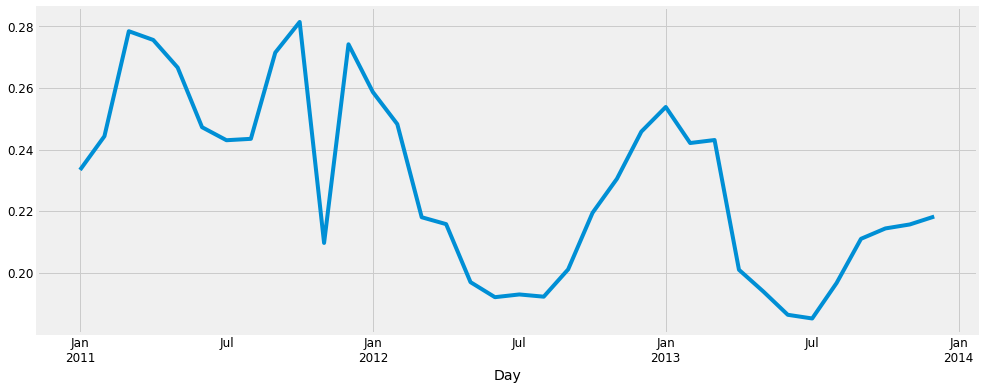

In [10]:
y.plot(figsize=(15, 6))
plt.show()

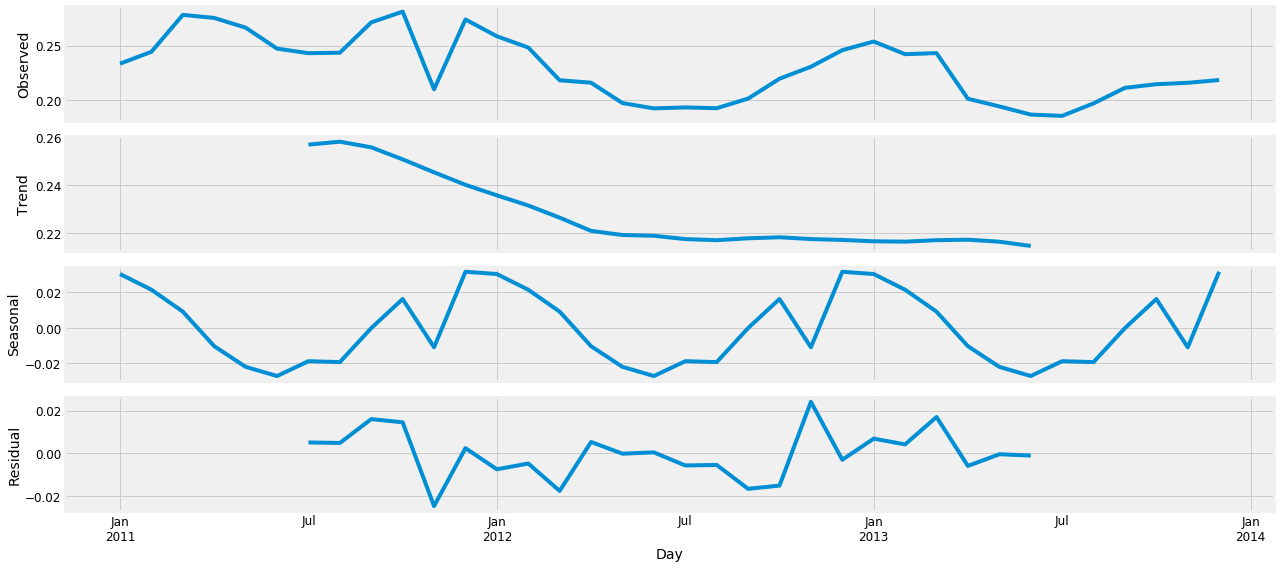

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [12]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-1.4068089639544814
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-87.93751319193827
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-86.64159035174887
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-85.93751406869248
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-42.24881143578476
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-94.9478508288714
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-103.92939969118031


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-92.97424790462269
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-166.04232967486695
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-96.48571594364122
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-164.05169873486395


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-95.43955248131569
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-165.76889857398345
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-96.23064202203427


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-163.9464031897622
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-95.24302882990538
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-164.19933585849324


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-102.29023943794544
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-162.25766315699283


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-100.85280045513161
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-163.93567987304638
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-100.78253875039428


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-162.14375851723796


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-99.51607291316066
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-165.79040364103295


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-96.1999220309305
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-163.93758507831978
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-95.28972982349643
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-163.7929426299146


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-94.2235285032708
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-161.95124730347948
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-93.27680331970706


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1315      1.350     -0.097      0.922      -2.776       2.514
ma.L1         -0.1630      1.285     -0.127      0.899      -2.682       2.356
ar.S.L12      -0.2919      0.425     -0.687      0.492      -1.125       0.541
sigma2         0.0007      0.000      3.079      0.002       0.000       0.001


C:\Users\David\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


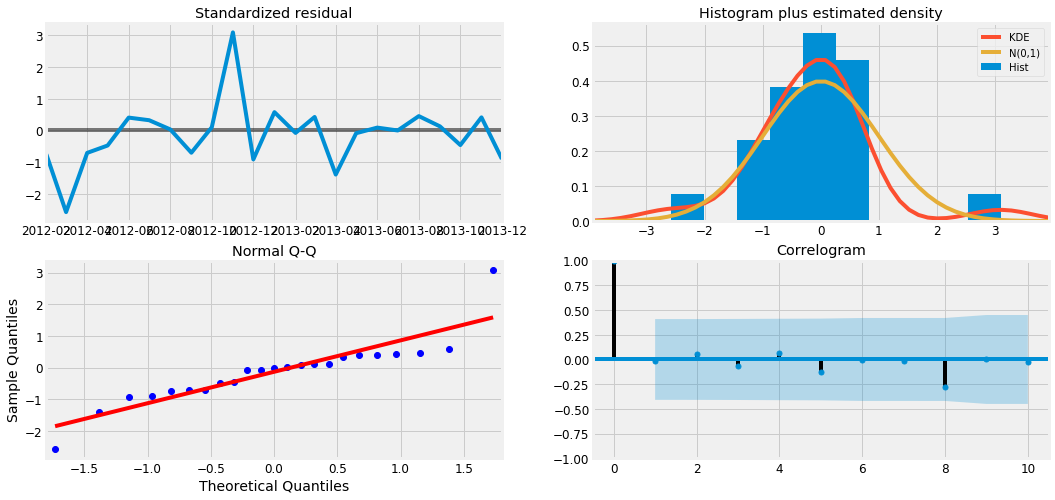

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

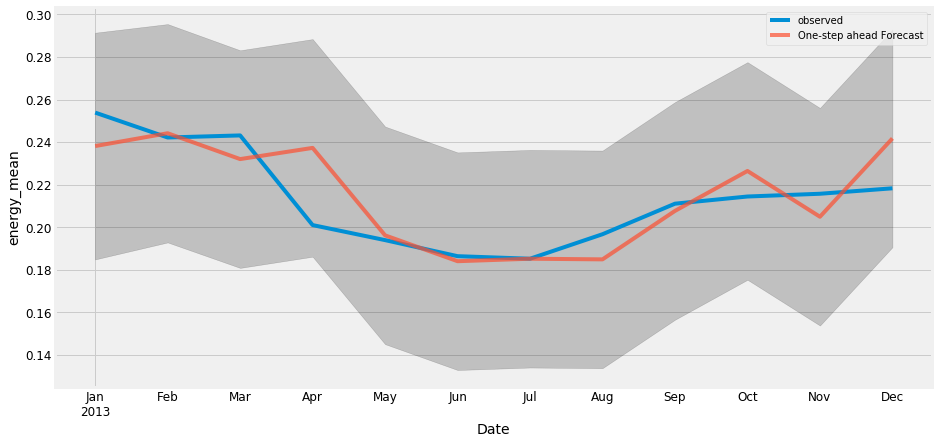

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('energy_mean')
plt.legend()
plt.show()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

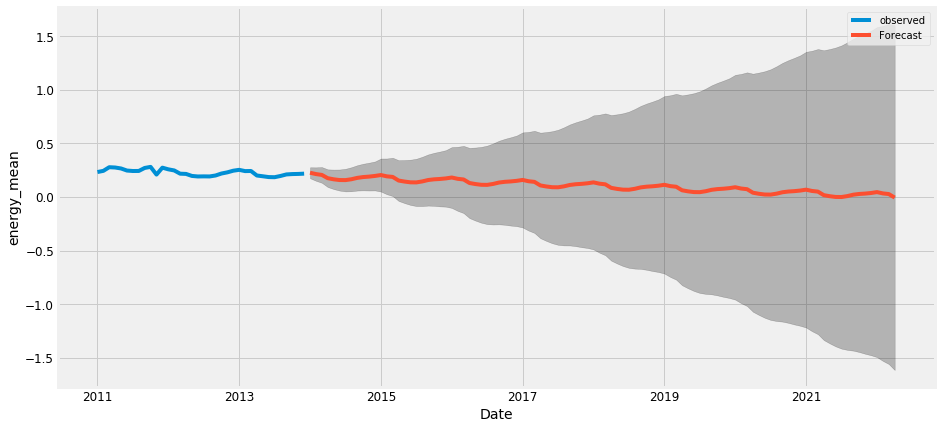

In [26]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('energy_mean')
plt.legend()
plt.show()